<a href="https://colab.research.google.com/github/Fayzulla2022/50projects50days/blob/master/Kmeans_CallDuration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Parameters for dataset
n_rows = 61287
# Let's assume number of calls range from 1 to 100
num_calls = np.random.randint(1, 100, n_rows)
# Mean call duration between 1 minute and 60 minutes
mean_duration = np.random.uniform(1, 60, n_rows)
# Standard deviation of call durations between 0.1 min and 20 min
std_dev_duration = np.random.uniform(0.1, 20, n_rows)

In [3]:
num_calls

array([26, 44, 93, ..., 46, 38, 62])

In [4]:
# Create a DataFrame
df = pd.DataFrame({
    'Number_of_Calls': num_calls,
    'Mean_Call_Duration': mean_duration,
    'Std_Dev_Call_Duration': std_dev_duration
})

In [5]:
df.head()

,Number_of_Calls,Mean_Call_Duration,Std_Dev_Call_Duration
0,26,57.015242,12.459563
1,44,3.764258,11.193346
2,93,31.503825,2.222258
3,55,43.906634,19.582056
4,76,17.325295,14.954849


In [6]:
df.shape

(61287, 3)

In [7]:
# Feature Standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Choose the value of k, for demonstration purposes let's choose 5
k = 5

In [8]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

In [9]:
set(clusters)

{0, 1, 2, 3, 4}

In [10]:
# Add the cluster data to the original dataframe
df['Cluster'] = clusters

In [11]:
df[df['Cluster']==2]

,Number_of_Calls,Mean_Call_Duration,Std_Dev_Call_Duration,Cluster
3,55,43.906634,19.582056,2
24,77,54.743845,14.344980,2
31,75,52.898479,9.927169,2
32,97,20.997187,14.172689,2
37,54,43.784767,16.206750,2
...,...,...,...,...
61264,87,29.629328,18.384116,2
61265,75,29.240002,16.592990,2
61266,76,58.844352,6.945100,2
61273,76,31.523987,14.283735,2


In [12]:
# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(df_scaled, clusters)
silhouette_avg

0.26523141993796645

**Cluster Visualization:**

* Visualization can help identify outliers or points that don’t neatly fit into any cluster.

* It also shows how distinct the clusters are from each other. **If clusters are overlapping significantly, it might indicate that the chosen number of clusters (k) is not optimal**, or the features used for clustering do not adequately separate the data into meaningful groups.

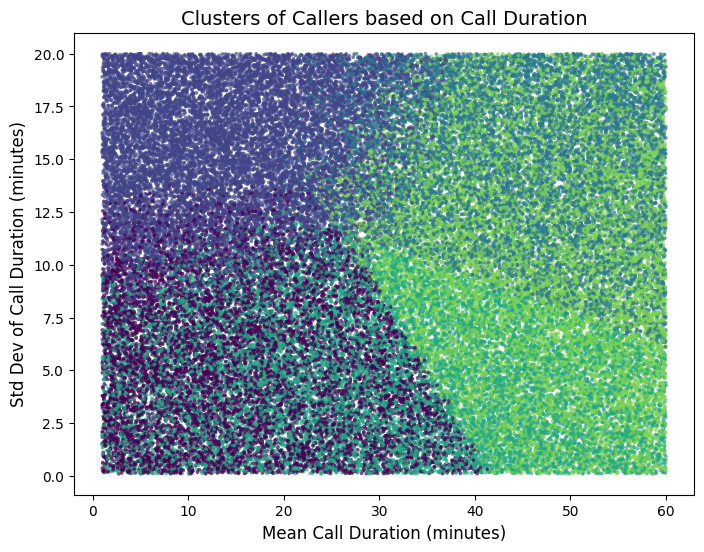

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Use a different colormap, for example, 'viridis' which offers good contrast and clarity
colors = plt.cm.viridis(clusters.astype(float) / k)

ax.scatter(df['Mean_Call_Duration'], df['Std_Dev_Call_Duration'], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

# Adding labels for clarity
ax.set_xlabel('Mean Call Duration (minutes)', fontsize=12)
ax.set_ylabel('Std Dev of Call Duration (minutes)', fontsize=12)
ax.set_title('Clusters of Callers based on Call Duration', fontsize=14)

plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'k' is the number of clusters and 'clusters' contains your cluster labels
k = 5  # Example: 5 clusters
clusters_unique = np.unique(clusters)  # Find the unique cluster labels

# Generate colors for each cluster
colors_for_clusters = plt.cm.viridis(clusters_unique.astype(float) / k)

# Print or plot the colors for each cluster
for i, color in enumerate(colors_for_clusters):
    print(f"Cluster {clusters_unique[i]} color: {color}")


Cluster 0 color: [0.267004 0.004874 0.329415 1.      ]
Cluster 1 color: [0.253935 0.265254 0.529983 1.      ]
Cluster 2 color: [0.163625 0.471133 0.558148 1.      ]
Cluster 3 color: [0.134692 0.658636 0.517649 1.      ]
Cluster 4 color: [0.477504 0.821444 0.318195 1.      ]


**Array structure is as follows:**

[Centroid 1 for Feature 1 Centroid 1 for Feature 2 Centroid 1 for Feature 3]

**Elbow Method:**

* The method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters (k). WCSS is the sum of squared distances between **each point and the centroid of its cluster.**




**How It Works:**
* As the number of clusters increases, the WCSS naturally decreases because the points will be closer to the centroids they are assigned to.

* However, after a certain number of clusters, the **decrease in WCSS begins to slow down significantly, indicating that additional clusters are not meaningfully improving the fit of the model to the data. This point, where the plot starts to bend and the rate of decrease lessens, is known as the "elbow".**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

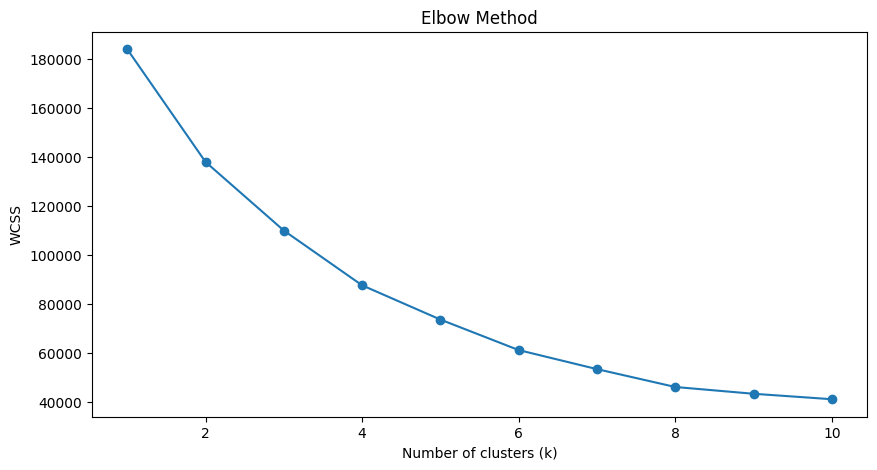

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df_scaled is your standardized data.
wcss = []
for i in range(1, 11): # Testing k from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_) # Inertia: Sum of squared distances of samples to their closest cluster center

# Plotting the results onto a line graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


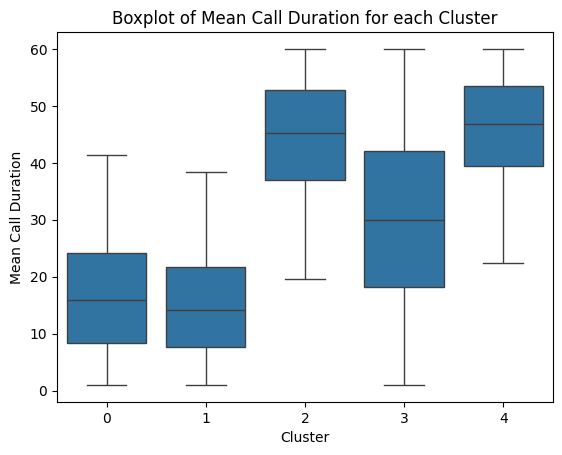

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame with a 'Cluster' column and 'Mean_Call_Duration' feature
sns.boxplot(x='Cluster', y='Mean_Call_Duration', data=df)

plt.title('Boxplot of Mean Call Duration for each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Call Duration')
plt.show()


References:

https://builtin.com/data-science/step-step-explanation-principal-component-analysis

https://www.projectpro.io/data-science-in-python-tutorial/principal-component-analysis-tutorial